In [ ]:
# import te required libraries
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import deep learning libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# ignore harmless warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the training data
x_train = np.loadtxt('/content/drive/MyDrive/AI /Copy of input.csv', delimiter=',')
y_train = np.loadtxt('/content/drive/MyDrive/AI /Copy of labels.csv', delimiter=',')

# Importing the testing data
x_test = np.loadtxt('/content/drive/MyDrive/AI /Copy of input_test.csv', delimiter=',')
y_test = np.loadtxt('/content/drive/MyDrive/AI /Copy of labels_test.csv', delimiter=',')


In [ ]:
# x_train

In [ ]:
y_train

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
# Dimension of the data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# (2000, 30000) --> 2000 images of each having 30000 columns, each column is a pixel

(2000, 30000)
(2000,)
(400, 30000)
(400,)


In [ ]:
# pixel values
print('Minimum pixel value:', x_train.min())
print('Maximum pixel value:', x_train.max())

# This represents the image can be RGB

Minimum pixel value: 0.0
Maximum pixel value: 255.0


In [ ]:
# size per image = 100px x 100px
# gradient = RGB = 3 layers

# 100px x 100px x 3 layers = 30000 columns

In [ ]:
# reshape the training data
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

# reshape the test data
x_test = x_test.reshape(len(x_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

In [ ]:
# data after reshaping
print('Shape of the data after reshaping:')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Shape of the data after reshaping:
(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


In [ ]:
# Dimensions of the data after reshaping
print('Dimension of the data after reshaping:')
print(x_train.ndim)
print(y_train.ndim)
print(x_test.ndim)
print(y_test.ndim)

Dimension of the data after reshaping:
4
2
4
2


In [ ]:
# Data scaling
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train

array([[[[0.14509804, 0.15294118, 0.09803922],
         [0.10196078, 0.09411765, 0.03529412],
         [0.13333333, 0.09803922, 0.03921569],
         ...,
         [0.22352941, 0.17254902, 0.1372549 ],
         [0.23921569, 0.18431373, 0.14901961],
         [0.25490196, 0.2       , 0.16470588]],

        [[0.17647059, 0.16862745, 0.10980392],
         [0.10980392, 0.09803922, 0.03137255],
         [0.20392157, 0.15686275, 0.09411765],
         ...,
         [0.21176471, 0.16078431, 0.1254902 ],
         [0.22352941, 0.16862745, 0.13333333],
         [0.23921569, 0.18431373, 0.14901961]],

        [[0.20392157, 0.17647059, 0.10196078],
         [0.1254902 , 0.09411765, 0.01960784],
         [0.27058824, 0.21176471, 0.1372549 ],
         ...,
         [0.21176471, 0.15686275, 0.11372549],
         [0.21960784, 0.16470588, 0.12156863],
         [0.23137255, 0.17647059, 0.13333333]],

        ...,

        [[0.07843137, 0.15294118, 0.        ],
         [0.39607843, 0.49019608, 0.2627451 ]

In [ ]:
# unique target value
np.unique(y_train)

array([0., 1.])

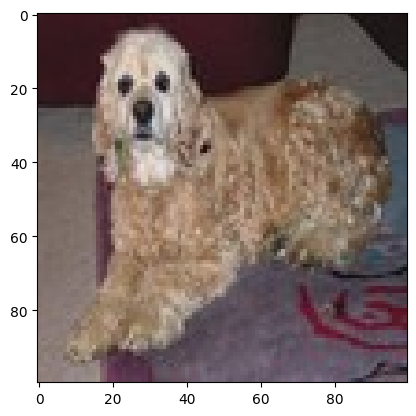

The target label is: [0.]


In [ ]:
# printing the first image
plt.imshow(x_train[1238, :])
plt.show()

# print the target for the first image
print('The target label is:', y_train[18])

In [ ]:

# This target label with the training image states 0 is dog 1 is cat

In [ ]:
# --- DONT RUN THIS CELL --- #

# Traditional way of building the network
# model building
# model = Sequential()

# # First Conv Layer
# model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(100, 100, 3)))   # 32 - no.of.filters each of size 3x3
# model.MaxPooling2D((2,2))

# # Second Conv Layer
# model.add(Conv2D(32, (3, 3), activation = 'relu'))
# model.MaxPooling2D((2,2))

# # Flattening layer
# model.add(Flatten())

# # Fully connected layer
# # first dense layer
# model.add(Dense(70, activation='relu'))   # 70 neurons in the connecting layer
# # final output layer
# model.add(Dense(1, activation='sigmoid'))

In [ ]:

# Conventional way
model = Sequential([
    # first conv layer
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2,2)),

    # second conv layer
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    # Flatter
    Flatten(),

    # First Dense layer
    Dense(70, activation='relu'),

    # Output layer
    Dense(1, activation='sigmoid')
])

In [ ]:

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# training the model with the data
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 364ms/step - accuracy: 0.5029 - loss: 0.7380
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 331ms/step - accuracy: 0.5795 - loss: 0.6849
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 326ms/step - accuracy: 0.6515 - loss: 0.6327
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 326ms/step - accuracy: 0.7146 - loss: 0.5521
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 330ms/step - accuracy: 0.7768 - loss: 0.4764


In [ ]:

# evaluating the model
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.7513 - loss: 0.4888


[0.6400146484375, 0.6850000023841858]

In [ ]:

# trainng data distribution of target
unique, counts = np.unique(y_train, return_counts=True)
print(unique, counts)

[0. 1.] [1000 1000]


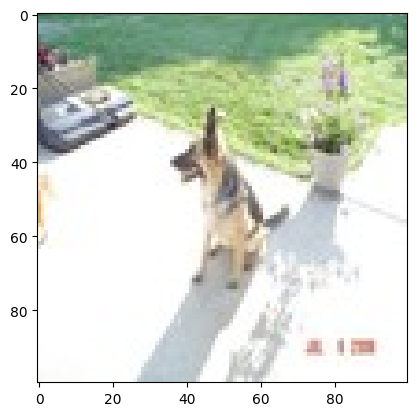

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction Probability: [[0.72278386]]
The actual image is: Dog
The model has predicted as: Cat


In [ ]:


# predictions
rdm_img = random.randint(0, len(x_test))
plt.imshow(x_test[rdm_img, :])
plt.show()

# actual condition
if y_test[rdm_img, :] == 0:
    actual = 'Dog'
else:
    actual = 'Cat'

# prediction for the given image
y_pred = model.predict(x_test[rdm_img, :].reshape(1, 100, 100, 3))
print('Prediction Probability:', y_pred)

if y_pred >= 0.5:
    pred = 'Cat'
else:
    pred = 'Dog'

print('The actual image is:', actual)
print('The model has predicted as:', pred)